<a href="https://colab.research.google.com/github/jpshimidt/DataScience/blob/main/Data_Viking_EDA_FEMINICIDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados do número de feminicídios no Estado de SP
##EDA Desenvolvido na Semana Data Science - Data Vinking
*Fonte dos dados: http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx*

###Importação das bibliotecas

In [14]:
#Requests lib para https
import requests

#BS para scraping de HTML
from bs4 import BeautifulSoup

#Lib para modelagem de dados
import pandas as pd

#Lib para auxílio da datação dos dados
import datetime
from dateutil.relativedelta import relativedelta

#Libs para plotagem dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Coleta dos dados a partir da Lib Beautiful Soup & Request

In [15]:
#Carregamento da Pagina
Site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

# Requisição dos dados semiestruturados do site
Pagina = requests.get(Site)

In [16]:
#Transformação dos dados em uma estrutura HTML
Coleta = BeautifulSoup(Pagina.text, 'html.parser')

In [17]:
#Exemplo de como navegar dentro da estrutura HTML
Coleta.find(id='conteudo_repPeriodo_lblPeriodo_2').get_text()

'Ocorrências Registradas no mês: Novembro de 2021'

In [18]:
#Buscar todas as tabelas do site
Tabelas = Coleta.find_all('table', attrs={'class':'table table-striped table-hover table-condensed'})

### Minereção dos dados a partir das tabelas do site

In [19]:
#Declaração dos arrays onde ficará armazenado os dados
Rotulos = []
Dados = []
Periodos = []

#Última data publicada pelo Estado
Registro_Inicial = datetime.datetime(2021,11,1)
Loop = 0 #Variável de apoio

# Loop para preenchimento dos arrays
for Consulta in Tabelas:
  Linha = Consulta.find_all('tr')[2]
  Rotulo = Linha.find_all('td')[0].text
  Informacao = Linha.find_all('span')[0].text
  Data = Registro_Inicial - relativedelta(months=Loop)

  if Rotulo == 'FEMINICÍDIO':
    Dados.append(Informacao)
    Rotulos.append(Rotulo)
    Periodos.append(Data)

  else:
    pass

  Loop += 1

In [20]:
#Organização dos dados para seu uso
Dicionario = {
    'Rotulo' : Rotulos,
    'Quantidade': Dados,
    'Periodo': Periodos
}

Base_Dados = pd.DataFrame(Dicionario)

In [21]:
Base_Dados

,Rotulo,Quantidade,Periodo
0,FEMINICÍDIO,9,2021-11-01
1,FEMINICÍDIO,9,2021-10-01
2,FEMINICÍDIO,6,2021-09-01
3,FEMINICÍDIO,8,2021-08-01
4,FEMINICÍDIO,8,2021-07-01
5,FEMINICÍDIO,7,2021-06-01
6,FEMINICÍDIO,26,2021-05-01
7,FEMINICÍDIO,10,2021-04-01
8,FEMINICÍDIO,21,2021-03-01
9,FEMINICÍDIO,11,2021-02-01


In [22]:
#Verificando se há valores nulos
Base_Dados.isnull().sum()

Rotulo        0
Quantidade    0
Periodo       0
dtype: int64

In [25]:
#Analisar o tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rotulo      47 non-null     object        
 1   Quantidade  47 non-null     object        
 2   Periodo     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.2+ KB


In [26]:
#Converter campos para númericos
Base_Dados['Quantidade'] = pd.to_numeric(Base_Dados['Quantidade'])

In [29]:
#Após a conversão para númerico
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rotulo      47 non-null     object        
 1   Quantidade  47 non-null     int64         
 2   Periodo     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [28]:
#Analises estatistícas 
Base_Dados.describe()

,Quantidade
count,47.000000
mean,13.297872
std,5.384821
min,5.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,27.000000


In [32]:
#Incluir Período como Index e retirar Rotulo
Dados = Base_Dados.set_index('Periodo')
Dados.drop(columns ='Rotulo', inplace = True)
Dados.head()

,Quantidade
Periodo,
2021-11-01,9
2021-10-01,9
2021-09-01,6
2021-08-01,8
2021-07-01,8


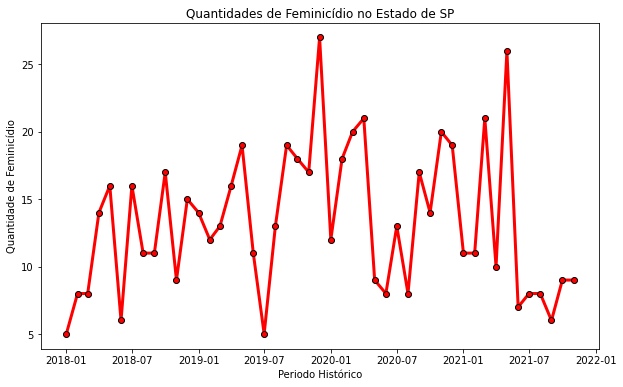

In [37]:
plt.figure(figsize=(10,6))
plt.title('Quantidades de Feminicídio no Estado de SP')
plt.xlabel('Periodo Histórico')
plt.ylabel('Quantidade de Feminicídio')

plt.plot(Dados, color='red',linewidth=3, marker='o', markeredgecolor='black');

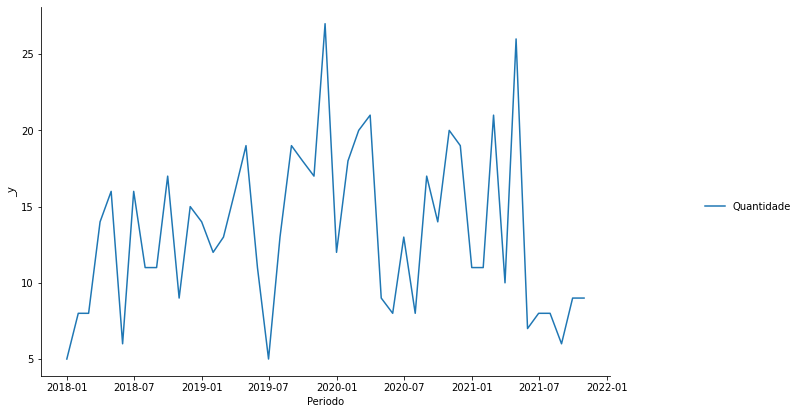

In [41]:
sns.relplot(data=Dados, kind='line');
plt.gcf().set_size_inches(12,6)

In [42]:
px.line(Dados, y='Quantidade',x=Dados.index, width=700,height=500)

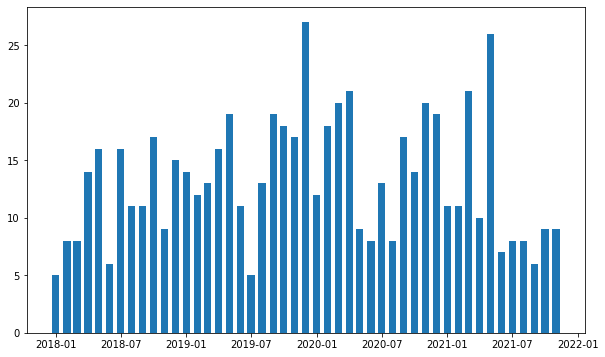

In [48]:
plt.figure(figsize=(10,6))
plt.bar(Dados.index,Dados['Quantidade'], width=20);

In [54]:
#Média móvel a cada Trimestre
Dados.sort_index(inplace=True)
Dados['Média Móvel'] = Dados.rolling(3).mean()
Dados.head()

,Quantidade,Média Móvel
Periodo,,
2018-01-01,5,NaN
2018-02-01,8,NaN
2018-03-01,8,7.000000
2018-04-01,14,10.000000
2018-05-01,16,12.666667


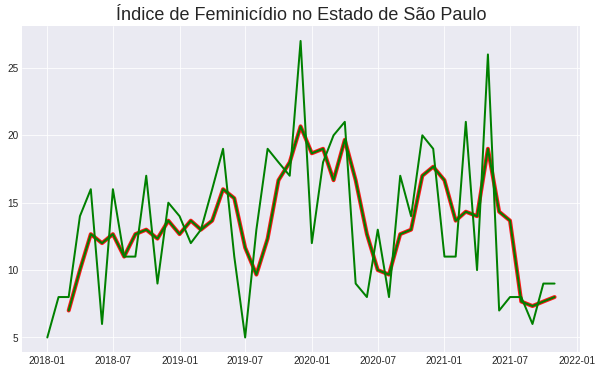

In [64]:
#Alterar o estilo do matplot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.plot(Dados.index, Dados['Média Móvel'], linewidth=4, alpha=0.9, color='red')
plt.plot(Dados, color='green',linewidth=2)
plt.title('Índice de Feminicídio no Estado de São Paulo', loc='center', fontsize=18);